In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit as fit

In [2]:
df = pd.read_csv('Magnet Calibration.csv', delimiter=';')
df.head()

,I,B1,B2
0,0,3.0,2.0
1,1,28.2,23.6
2,2,54.5,50.2
3,3,80.0,76.4
4,4,106.8,105.9


In [3]:
def linear(x, a, b):
    return a * x + b

In [4]:
a1, b1 = fit(linear, df['I'].values, df['B1'].values)[0]
a1

26.138906073714647

In [5]:
a2, b2 = fit(linear, -df['I'].values, df['B2'].values)[0]
a2

-26.337667698718047

In [6]:
#Ток Амперы, Поле в мТл

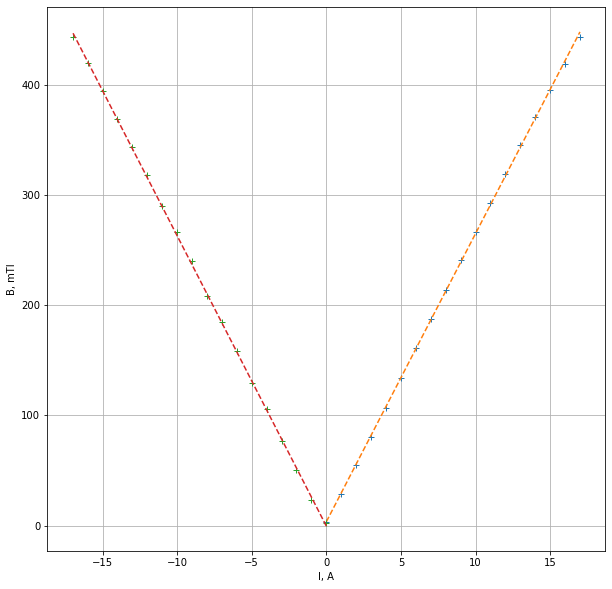

In [7]:
plt.figure(figsize=(10, 10))
plt.plot(df['I'].values, df['B1'].values, '+')
plt.plot(df['I'].values, a1 * df['I'].values + b1, '--')
plt.plot(-df['I'].values, df['B2'].values, '+')
plt.plot(-df['I'].values, -a2 * df['I'].values + b2, '--')
plt.ylabel('B, mTl')
plt.xlabel('I, A')
plt.grid()
plt.show()

## Зависимость поперечного напряжение от внешнего магнитного поля при комнатной температуре

Данные в 3-ем файле при обычном поле непригодны. Данные после третьего имеют неверный ток, он должен быть на 1 ампер меньше. Это учтено в коде.

In [8]:
U_array_pos = []
for i in range(3):
    data = pd.read_csv('ABWarm+/' + str(i) + '.csv', index_col=0, delimiter=';')
    U_array_pos.append(data['X'].values.mean())
for i in range(4, 19):
    data = pd.read_csv('ABWarm+/' + str(i) + '.csv', index_col=0, delimiter=';')
    U_array_pos.append(data['X'].values.mean())

In [9]:
I = 5 / (5050)
R_array_pos = np.array(U_array_pos) / I

In [10]:
U_array_neg = []
for i in range(18):
    data = pd.read_csv('ABWarm-/' + str(-i) + '.csv', index_col=0, delimiter=';')
    U_array_neg.append(data['X'].values.mean())

In [11]:
I = 5 / (5050)
R_array_neg = np.array(U_array_neg) / I
R_array_neg = R_array_neg[::-1]

In [12]:
R_array = np.hstack((R_array_neg, R_array_pos))

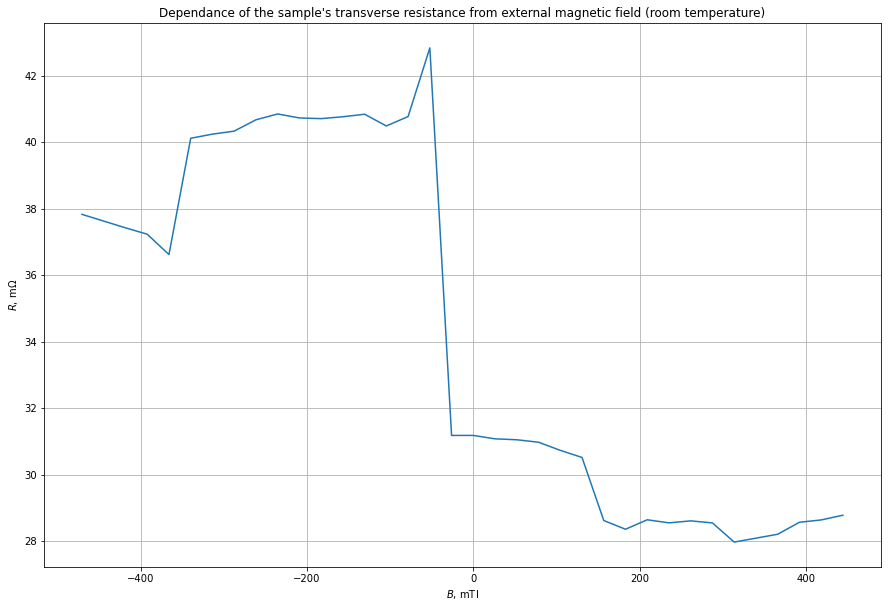

In [13]:
plt.figure(figsize=(15, 10))
plt.plot(np.arange(-len(U_array_neg), len(U_array_neg)) * 26.138906073714647, R_array * 1000)
plt.title('Dependance of the sample\'s transverse resistance from external magnetic field (room temperature)')
plt.xlabel('$B$, mTl')
plt.ylabel('$R$, m$\Omega$')
plt.grid()

plt.show()

## Решили, что данные испорчены и сделали новые по 7-ми точками

In [14]:
data = pd.read_csv('test.csv', delimiter=';')
data

,I_mag,X
0,-17,21.40
1,-10,20.72
2,-5,20.30
3,0,19.92
4,5,19.50
5,10,19.13
6,17,18.64


In [15]:
I = 5 / (5050)
R_array_enh = data['X'].values / 1e6 / I

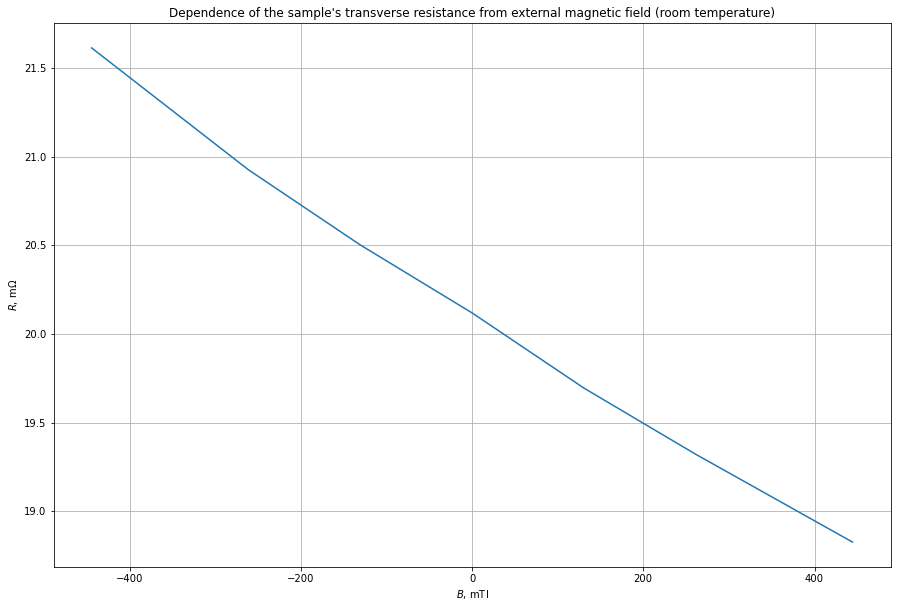

In [16]:
plt.figure(figsize=(15, 10))
plt.plot(data['I_mag'].values * 26.138906073714647, R_array_enh * 1000),
plt.title('Dependence of the sample\'s transverse resistance from external magnetic field (room temperature)')
plt.xlabel('$B$, mTl')
plt.ylabel('$R$, m$\Omega$')
plt.grid()
plt.show()

Продольное напряжение при комнатной температуре: 229 $\mu$В

Продольное напряжение при температуре азота: 17.46 $\mu$В

## Поперечное напряжение

In [17]:
U_array_pos = []
for i in range(17):
    data = pd.read_csv('ABCold+/' + str(i) + '.csv', index_col=0, delimiter=';')
    U_array_pos.append(data['X'].values.mean())

In [18]:
I = 5 / (5050)
R_array_pos = np.array(U_array_pos) / I

In [19]:
U_array_neg = []
for i in range(1, 18):
    data = pd.read_csv('ABCold-/' + str(-i) + '.csv', index_col=0, delimiter=';')
    U_array_neg.append(data['X'].values.mean())

In [20]:
I = 5 / (5050)
R_array_neg = np.array(U_array_neg) / I
R_array_neg = R_array_neg[::-1]

In [21]:
R_array = np.hstack((R_array_neg, R_array_pos))

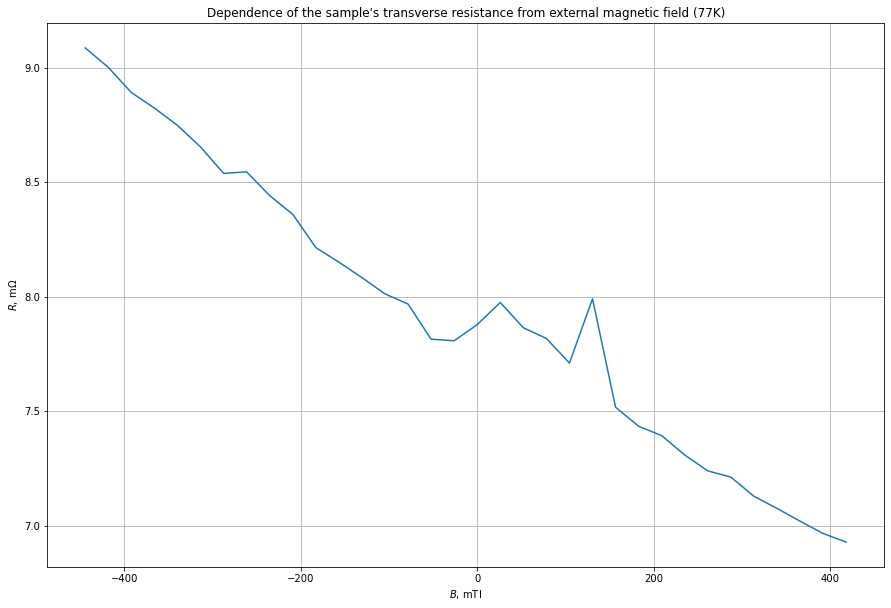

In [22]:
plt.figure(figsize=(15, 10))
plt.plot(np.arange(-len(U_array_pos), len(U_array_pos)) * 26.138906073714647, R_array * 1000)
plt.title('Dependence of the sample\'s transverse resistance from external magnetic field (77K)')
plt.xlabel('$B$, mTl')
plt.ylabel('$R$, m$\Omega$')
plt.grid()

plt.show()

## Продольное напряжение

In [72]:
U_array = []
for i in range(-17, 0):
    data = pd.read_csv('BCCold+-/' + str(i) + '.csv', index_col=0, delimiter=';')
    U_array.append(data['X'].values.mean() + i * 1e-8 * 1.5)

In [73]:
for i in range(18):
    data = pd.read_csv('BCCold+-/' + str(i) + '.csv', index_col=0, delimiter=';')
    U_array.append(data['X'].values.mean())

In [74]:
I = 5 / (5050)
R_array = np.array(U_array) / I

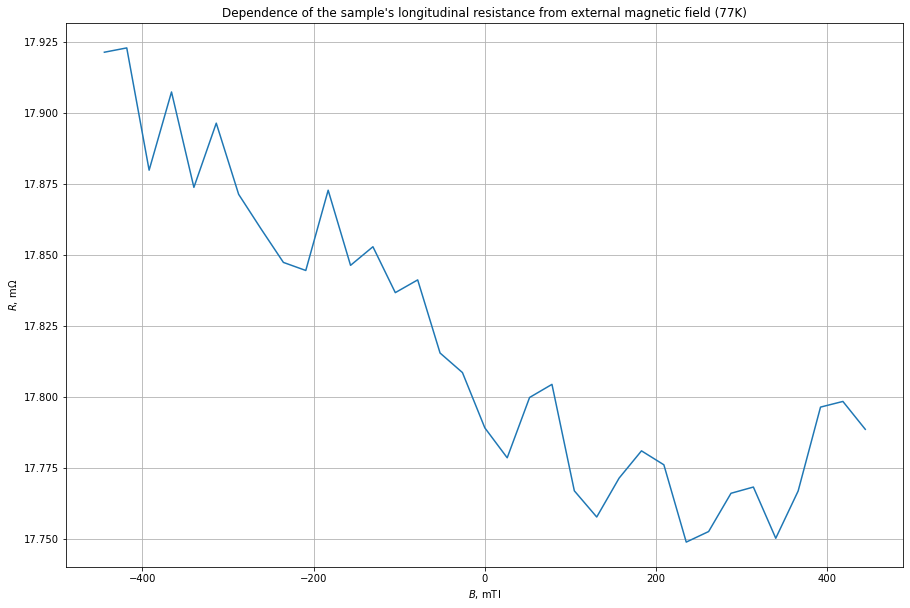

In [75]:
plt.figure(figsize=(15, 10))
plt.plot(np.arange(-17, 18) * 26.138906073714647, R_array * 1000)
plt.title('Dependence of the sample\'s longitudinal resistance from external magnetic field (77K)')
plt.xlabel('$B$, mTl')
plt.ylabel('$R$, m$\Omega$')
plt.grid()

plt.show()